# ML HW1 | Supervised Learning | Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

## Set directory

In [26]:
directory = "/Users/michaelpecorino/Documents/GitLab/nba/"

## Load inputs

In [27]:
ncaa_all = pd.read_csv(directory + "nba_all.csv")
train = pd.read_csv(directory + "nba_train.csv")
valid = pd.read_csv(directory + "nba_valid.csv")
test = pd.read_csv(directory + "nba_test.csv")

## Define features and response variable

### Features

In [28]:
features = ["game_win_perc_prop", 
            "game_starters_total_minutes_prop", "game_starters_prop_minutes_prop", "game_player_pts_10plus_prop",
            "game_player_pts_15plus_prop", "game_player_pts_16plus_prop", "game_player_pts_17plus_prop",
            "game_player_pts_18plus_prop", "game_player_pts_19plus_prop", "game_player_pts_20plus_prop",
            "game_player_pts_21plus_prop", "game_player_pts_22plus_prop", "game_player_ast_3plus_prop",
            "game_player_ast_5plus_prop", "game_player_ast_7plus_prop",
            "game_player_orb_1plus_prop", "game_player_orb_2plus_prop", "game_player_orb_3plus_prop",
            "game_player_drb_5plus_prop", "game_player_drb_7plus_prop", "game_player_drb_10plus_prop",
            "game_gs_mean_prop", "game_gs_max_prop", "game_pos_prop", "game_pts_prop", "game_efficiency_prop",
            "game_fg_attempted_prop", "game_ft_attempted_prop", "game_ft_made_prop", "game_stl_prop",
            "game_tov_prop","game_stl_tov_ratio_diff", "game_stl_tov_ratio_prop", "game_blk_prop",
            "game_orb_prop", "game_drb_prop", "game_trb_prop", "game_ast_prop", "game_pf_diff", "game_pf_prop",
            "home_indicator", "game_age_mean_prop"]
ncaa_all_features = ncaa_all[features]
train_features = train[features]
valid_features = valid[features]
train_valid_features = train_features.append(valid_features)
test_features = test[features]

### Response variable

In [29]:
response_variable = "win_indicator"
ncaa_all_response = ncaa_all[response_variable]
train_response = train[response_variable]
valid_response = valid[response_variable]
train_valid_resposnse = train_response.append(valid_response)
test_response = test[response_variable]

## Boosted trees

In [30]:
xgboost_model = GradientBoostingClassifier(loss = 'exponential', #deviance, exponential,
                                           learning_rate = 0.08,
                                           n_estimators = 100,
                                           subsample = 1.0,
                                           criterion = 'friedman_mse',
                                           min_samples_split = 2,
                                           min_samples_leaf = 1,
                                           min_weight_fraction_leaf = 0.0,
                                           max_depth = 3,
                                           min_impurity_decrease = 0.0,
                                           min_impurity_split = None,
                                           init = None,
                                           random_state = 1,
                                           max_features = None,
                                           verbose = 2,
                                           max_leaf_nodes = None,
                                           warm_start = False
                                           #presort = 'auto',
                                           #validation_fraction = 0.1,
                                           #n_iter_no_change = None,
                                           #tol = 0.0001
                                          )

xgboost_model.fit(train_features, train_response) 

print("XGBoost accuracy on training data: ", xgboost_model.score(train_features, train_response))
print("XGBoost accuracy on validation data: ", xgboost_model.score(valid_features, valid_response))

      Iter       Train Loss   Remaining Time 
         1           0.9843            6.45s
         2           0.9707            5.84s
         3           0.9588            5.71s
         4           0.9484            5.73s
         5           0.9390            5.73s
         6           0.9309            5.67s
         7           0.9240            5.67s
         8           0.9178            5.78s
         9           0.9123            5.79s
        10           0.9074            5.66s
        11           0.9029            5.65s
        12           0.8990            5.66s
        13           0.8954            5.66s
        14           0.8922            5.59s
        15           0.8892            5.58s
        16           0.8865            5.59s
        17           0.8840            5.52s
        18           0.8816            5.39s
        19           0.8793            5.33s
        20           0.8770            5.27s
        21           0.8750            5.20s
        2

### Grid search

In [31]:
folds = set(train['fold'])
folds

{1, 2, 3, 4, 5}

In [26]:
xgb_results = pd.DataFrame(columns = ['learning_rate', 'min_samples_split', 'max_depth', 'fold',
                                      'in_fold_accuracy', 'out_fold_accuracy'])

min_samples_splits = [2, 10, 50, 100]
max_depths = [3, 4, 5, 6]
learning_rates = [.02, .075, .150, .2]
for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            for fold in folds:
                
                #Debugging
                #min_samples_split = 2
                #max_depth = 3
                #learning_rate = .02
                #fold = 1
        
                train_features_in_fold = train[train["fold"] != fold][features]
                train_response_in_fold = train[train["fold"] != fold][response_variable]

                test_features_out_fold = train[train["fold"] == fold][features]
                test_response_out_fold = train[train["fold"] == fold][response_variable]
            
                print("Modeling fold", fold, "with min_samples_split:", min_samples_split,
                      ", max_depth:", max_depth,
                      ", and learning_rate:", learning_rate)

                xgboost_model = GradientBoostingClassifier(loss = 'exponential', #deviance, exponential,
                                                           learning_rate = learning_rate,
                                                           n_estimators = 500,
                                                           subsample = 1.0,
                                                           criterion = 'friedman_mse',
                                                           min_samples_split = min_samples_split,
                                                           min_samples_leaf = 1,
                                                           min_weight_fraction_leaf = 0.0,
                                                           max_depth = max_depth,
                                                           min_impurity_decrease = 0.0,
                                                           min_impurity_split = None,
                                                           init = None,
                                                           random_state = 28,
                                                           max_features = None,
                                                           #verbose = 1,
                                                           max_leaf_nodes = None,
                                                           warm_start = False,
                                                           #presort = 'auto',
                                                           validation_fraction = 0.25,
                                                           n_iter_no_change = 10,
                                                           #tol = 0.0001
                                                          )
                xgboost_model.fit(train_features_in_fold, train_response_in_fold) 

                in_fold_accuracy = xgboost_model.score(train_features_in_fold, train_response_in_fold)
                out_fold_accuracy = xgboost_model.score(test_features_out_fold, test_response_out_fold)

                xgb_results = xgb_results.append({'learning_rate': learning_rate,
                                                  'min_samples_split': min_samples_split,
                                                  'max_depth': max_depth,
                                                  'fold': fold,
                                                  'in_fold_accuracy': in_fold_accuracy,
                                                  'out_fold_accuracy': out_fold_accuracy},
                                                ignore_index = True)
                print(xgb_results, "\n")

Modeling fold 1 with min_samples_split: 2 , max_depth: 3 , and learning_rate: 0.02
   learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.02                2.0        3.0   1.0          0.715422   

   out_fold_accuracy  
0           0.707182   

Modeling fold 2 with min_samples_split: 2 , max_depth: 3 , and learning_rate: 0.02
   learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.02                2.0        3.0   1.0          0.715422   
1           0.02                2.0        3.0   2.0          0.709644   

   out_fold_accuracy  
0           0.707182  
1           0.692946   

Modeling fold 3 with min_samples_split: 2 , max_depth: 3 , and learning_rate: 0.02
   learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.02                2.0        3.0   1.0          0.715422   
1           0.02                2.0        3.0   2.0          0.709644   
2           0.02                2.0   

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   

    out_fold_accuracy  


    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
5           0.075                2.0        3.0   1.0          0.720954   
6           0.075                2.0        3.0   2.0          0.715175   
7           0.075                2.0        3.0   3.0          0.725544   
8           0.075                2.0        3.0   4.0          0.737988   
9           0.075                2.0        3.0   5.0          0.713446   
10          0.150                2.0        3.0   1.0          0.721992   
11          0.150                2.0        3.0   2.0          0.719668   
12          0.150        

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.715422   
1            0.02                2.0        3.0   2.0          0.709644   
2            0.02                2.0        3.0   3.0          0.715866   
3            0.02                2.0        3.0   4.0          0.722779   
4            0.02                2.0        3.0   5.0          0.712755   
..            ...                ...        ...   ...               ...   
56           0.20                2.0        5.0   2.0          0.793985   
57           0.20                2.0        5.0   3.0          0.799170   
58           0.20                2.0        5.0   4.0          0.791912   
59           0.20                2.0        5.0   5.0          0.786727   
60           0.02                2.0        6.0   1.0          0.834716   

    out_fold_accuracy  
0            0.707182  
1            0.692946  
2            0.663900  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
..            ...                ...        ...   ...               ...   
63          0.020                2.0        6.0   4.0          0.809886   
64          0.020                2.0        6.0   5.0          0.808849   
65          0.075                2.0        6.0   1.0          0.839212   
66          0.075                2.0        6.0   2.0          0.825786   
67          0.075                2.0        6.0   3.0          0.832700   

    out_fold_accuracy  
0            0.707182  
1            0.692946  
2            0.663900  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.715422   
1            0.02                2.0        3.0   2.0          0.709644   
2            0.02                2.0        3.0   3.0          0.715866   
3            0.02                2.0        3.0   4.0          0.722779   
4            0.02                2.0        3.0   5.0          0.712755   
..            ...                ...        ...   ...               ...   
70           0.15                2.0        6.0   1.0          0.840249   
71           0.15                2.0        6.0   2.0          0.828552   
72           0.15                2.0        6.0   3.0          0.829934   
73           0.15                2.0        6.0   4.0          0.821293   
74           0.15                2.0        6.0   5.0          0.822675   

    out_fold_accuracy  
0            0.707182  
1            0.692946  
2            0.663900  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.715422   
1            0.02                2.0        3.0   2.0          0.709644   
2            0.02                2.0        3.0   3.0          0.715866   
3            0.02                2.0        3.0   4.0          0.722779   
4            0.02                2.0        3.0   5.0          0.712755   
..            ...                ...        ...   ...               ...   
77           0.20                2.0        6.0   3.0          0.835811   
78           0.20                2.0        6.0   4.0          0.826478   
79           0.20                2.0        6.0   5.0          0.830971   
80           0.02               10.0        3.0   1.0          0.715422   
81           0.02               10.0        3.0   2.0          0.709644   

    out_fold_accuracy  
0            0.707182  
1            0.692946  
2            0.663900  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0           0.020                2.0        3.0   1.0          0.715422   
1           0.020                2.0        3.0   2.0          0.709644   
2           0.020                2.0        3.0   3.0          0.715866   
3           0.020                2.0        3.0   4.0          0.722779   
4           0.020                2.0        3.0   5.0          0.712755   
..            ...                ...        ...   ...               ...   
84          0.020               10.0        3.0   5.0          0.711718   
85          0.075               10.0        3.0   1.0          0.721300   
86          0.075               10.0        3.0   2.0          0.715175   
87          0.075               10.0        3.0   3.0          0.725544   
88          0.075               10.0        3.0   4.0          0.733149   

    out_fold_accuracy  
0            0.707182  
1            0.692946  
2            0.663900  
3  

    learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.02                2.0        3.0   1.0          0.715422   
1            0.02                2.0        3.0   2.0          0.709644   
2            0.02                2.0        3.0   3.0          0.715866   
3            0.02                2.0        3.0   4.0          0.722779   
4            0.02                2.0        3.0   5.0          0.712755   
..            ...                ...        ...   ...               ...   
91           0.15               10.0        3.0   2.0          0.719668   
92           0.15               10.0        3.0   3.0          0.726236   
93           0.15               10.0        3.0   4.0          0.720014   
94           0.15               10.0        3.0   5.0          0.716903   
95           0.20               10.0        3.0   1.0          0.731328   

    out_fold_accuracy  
0            0.707182  
1            0.692946  
2            0.663900  
3  

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
98            0.20               10.0        3.0   4.0          0.727273   
99            0.20               10.0        3.0   5.0          0.717249   
100           0.02               10.0        4.0   1.0          0.744122   
101           0.02               10.0        4.0   2.0          0.742828   
102           0.02               10.0        4.0   3.0          0.748358   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
105          0.075               10.0        4.0   1.0          0.755533   
106          0.075               10.0        4.0   2.0          0.746284   
107          0.075               10.0        4.0   3.0          0.748704   
108          0.075               10.0        4.0   4.0          0.746975   
109          0.075               10.0        4.0   5.0          0.732112   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
112           0.15               10.0        4.0   3.0          0.749741   
113           0.15               10.0        4.0   4.0          0.754580   
114           0.15               10.0        4.0   5.0          0.744901   
115           0.20               10.0        4.0   1.0          0.765214   
116           0.20               10.0        4.0   2.0          0.751815   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
119           0.20               10.0        4.0   5.0          0.749395   
120           0.02               10.0        5.0   1.0          0.786999   
121           0.02               10.0        5.0   2.0          0.773246   
122           0.02               10.0        5.0   3.0          0.779813   
123           0.02               10.0        5.0   4.0          0.771863   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
126          0.075               10.0        5.0   2.0          0.783961   
127          0.075               10.0        5.0   3.0          0.788455   
128          0.075               10.0        5.0   4.0          0.796405   
129          0.075               10.0        5.0   5.0          0.766678   
130          0.150               10.0        5.0   1.0          0.802905   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
133           0.15               10.0        5.0   4.0          0.786381   
134           0.15               10.0        5.0   5.0          0.777048   
135           0.20               10.0        5.0   1.0          0.812586   
136           0.20               10.0        5.0   2.0          0.790183   
137           0.20               10.0        5.0   3.0          0.798479   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
140           0.02               10.0        6.0   1.0          0.822960   
141           0.02               10.0        6.0   2.0          0.823367   
142           0.02               10.0        6.0   3.0          0.815417   
143           0.02               10.0        6.0   4.0          0.801590   
144           0.02               10.0        6.0   5.0          0.808849   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
147          0.075               10.0        6.0   3.0          0.828206   
148          0.075               10.0        6.0   4.0          0.811269   
149          0.075               10.0        6.0   5.0          0.811269   
150          0.150               10.0        6.0   1.0          0.831950   
151          0.150               10.0        6.0   2.0          0.834428   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
154           0.15               10.0        6.0   5.0          0.814034   
155           0.20               10.0        6.0   1.0          0.843361   
156           0.20               10.0        6.0   2.0          0.834082   
157           0.20               10.0        6.0   3.0          0.829243   
158           0.20               10.0        6.0   4.0          0.822330   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
161          0.020               50.0        3.0   2.0          0.708953   
162          0.020               50.0        3.0   3.0          0.716557   
163          0.020               50.0        3.0   4.0          0.717940   
164          0.020               50.0        3.0   5.0          0.708953   
165          0.075               50.0        3.0   1.0          0.719917   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
168          0.075               50.0        3.0   4.0          0.715866   
169          0.075               50.0        3.0   5.0          0.712755   
170          0.150               50.0        3.0   1.0          0.723029   
171          0.150               50.0        3.0   2.0          0.724853   
172          0.150               50.0        3.0   3.0          0.726236   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
175           0.20               50.0        3.0   1.0          0.720609   
176           0.20               50.0        3.0   2.0          0.721742   
177           0.20               50.0        3.0   3.0          0.740754   
178           0.20               50.0        3.0   4.0          0.741099   
179           0.20               50.0        3.0   5.0          0.717594   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
182          0.020               50.0        4.0   3.0          0.741791   
183          0.020               50.0        4.0   4.0          0.741445   
184          0.020               50.0        4.0   5.0          0.726927   
185          0.075               50.0        4.0   1.0          0.749654   
186          0.075               50.0        4.0   2.0          0.743173   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
189          0.075               50.0        4.0   5.0          0.734877   
190          0.150               50.0        4.0   1.0          0.737898   
191          0.150               50.0        4.0   2.0          0.744556   
192          0.150               50.0        4.0   3.0          0.746975   
193          0.150               50.0        4.0   4.0          0.750778   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
196           0.20               50.0        4.0   2.0          0.751469   
197           0.20               50.0        4.0   3.0          0.757345   
198           0.20               50.0        4.0   4.0          0.760802   
199           0.20               50.0        4.0   5.0          0.744556   
200           0.02               50.0        5.0   1.0          0.767289   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
203          0.020               50.0        5.0   4.0          0.765987   
204          0.020               50.0        5.0   5.0          0.755271   
205          0.075               50.0        5.0   1.0          0.761757   
206          0.075               50.0        5.0   2.0          0.769789   
207          0.075               50.0        5.0   3.0          0.777739   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
210           0.15               50.0        5.0   1.0          0.790456   
211           0.15               50.0        5.0   2.0          0.771863   
212           0.15               50.0        5.0   3.0          0.776702   
213           0.15               50.0        5.0   4.0          0.770826   
214           0.15               50.0        5.0   5.0          0.764950   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
217           0.20               50.0        5.0   3.0          0.794331   
218           0.20               50.0        5.0   4.0          0.769098   
219           0.20               50.0        5.0   5.0          0.771172   
220           0.02               50.0        6.0   1.0          0.788036   
221           0.02               50.0        6.0   2.0          0.796751   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
224          0.020               50.0        6.0   5.0          0.786727   
225          0.075               50.0        6.0   1.0          0.798755   
226          0.075               50.0        6.0   2.0          0.797096   
227          0.075               50.0        6.0   3.0          0.800553   
228          0.075               50.0        6.0   4.0          0.796751   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
231           0.15               50.0        6.0   2.0          0.803664   
232           0.15               50.0        6.0   3.0          0.810232   
233           0.15               50.0        6.0   4.0          0.795714   
234           0.15               50.0        6.0   5.0          0.801936   
235           0.20               50.0        6.0   1.0          0.819156   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
238           0.20               50.0        6.0   4.0          0.805047   
239           0.20               50.0        6.0   5.0          0.801244   
240           0.02              100.0        3.0   1.0          0.711618   
241           0.02              100.0        3.0   2.0          0.713792   
242           0.02              100.0        3.0   3.0          0.714483   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
245          0.075              100.0        3.0   1.0          0.715076   
246          0.075              100.0        3.0   2.0          0.717940   
247          0.075              100.0        3.0   3.0          0.715866   
248          0.075              100.0        3.0   4.0          0.728655   
249          0.075              100.0        3.0   5.0          0.709644   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
252           0.15              100.0        3.0   3.0          0.739717   
253           0.15              100.0        3.0   4.0          0.737297   
254           0.15              100.0        3.0   5.0          0.714829   
255           0.20              100.0        3.0   1.0          0.718534   
256           0.20              100.0        3.0   2.0          0.725199   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
259           0.20              100.0        3.0   5.0          0.718286   
260           0.02              100.0        4.0   1.0          0.728907   
261           0.02              100.0        4.0   2.0          0.735223   
262           0.02              100.0        4.0   3.0          0.741445   
263           0.02              100.0        4.0   4.0          0.739717   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
266          0.075              100.0        4.0   2.0          0.746284   
267          0.075              100.0        4.0   3.0          0.747321   
268          0.075              100.0        4.0   4.0          0.747321   
269          0.075              100.0        4.0   5.0          0.732803   
270          0.150              100.0        4.0   1.0          0.759336   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
273           0.15              100.0        4.0   4.0          0.748012   
274           0.15              100.0        4.0   5.0          0.735569   
275           0.20              100.0        4.0   1.0          0.739627   
276           0.20              100.0        4.0   2.0          0.746630   
277           0.20              100.0        4.0   3.0          0.752506   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
280           0.02              100.0        5.0   1.0          0.756224   
281           0.02              100.0        5.0   2.0          0.754234   
282           0.02              100.0        5.0   3.0          0.764604   
283           0.02              100.0        5.0   4.0          0.751815   
284           0.02              100.0        5.0   5.0          0.748358   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
287          0.075              100.0        5.0   3.0          0.764604   
288          0.075              100.0        5.0   4.0          0.754926   
289          0.075              100.0        5.0   5.0          0.750778   
290          0.150              100.0        5.0   1.0          0.768672   
291          0.150              100.0        5.0   2.0          0.759765   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
294           0.15              100.0        5.0   5.0          0.758728   
295           0.20              100.0        5.0   1.0          0.777317   
296           0.20              100.0        5.0   2.0          0.757691   
297           0.20              100.0        5.0   3.0          0.776011   
298           0.20              100.0        5.0   4.0          0.763567   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
301          0.020              100.0        6.0   2.0          0.772554   
302          0.020              100.0        6.0   3.0          0.776357   
303          0.020              100.0        6.0   4.0          0.772900   
304          0.020              100.0        6.0   5.0          0.770135   
305          0.075              100.0        6.0   1.0          0.775588   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0            0.020                2.0        3.0   1.0          0.715422   
1            0.020                2.0        3.0   2.0          0.709644   
2            0.020                2.0        3.0   3.0          0.715866   
3            0.020                2.0        3.0   4.0          0.722779   
4            0.020                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
308          0.075              100.0        6.0   4.0          0.773246   
309          0.075              100.0        6.0   5.0          0.778085   
310          0.150              100.0        6.0   1.0          0.794606   
311          0.150              100.0        6.0   2.0          0.782579   
312          0.150              100.0        6.0   3.0          0.787072   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

     learning_rate  min_samples_split  max_depth  fold  in_fold_accuracy  \
0             0.02                2.0        3.0   1.0          0.715422   
1             0.02                2.0        3.0   2.0          0.709644   
2             0.02                2.0        3.0   3.0          0.715866   
3             0.02                2.0        3.0   4.0          0.722779   
4             0.02                2.0        3.0   5.0          0.712755   
..             ...                ...        ...   ...               ...   
315           0.20              100.0        6.0   1.0          0.798755   
316           0.20              100.0        6.0   2.0          0.777048   
317           0.20              100.0        6.0   3.0          0.792948   
318           0.20              100.0        6.0   4.0          0.779468   
319           0.20              100.0        6.0   5.0          0.784307   

     out_fold_accuracy  
0             0.707182  
1             0.692946  
2           

### Output

In [11]:
xgb_results = xgb_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
xgb_results.to_csv(directory + "xgb_grid_search.csv")
xgb_results

,learning_rate,min_samples_split,max_depth,fold,in_fold_accuracy,out_fold_accuracy
283,0.020,100.0,5.0,4.0,0.753889,0.713693
165,0.075,50.0,3.0,1.0,0.725450,0.712707
203,0.020,50.0,5.0,4.0,0.766678,0.712310
145,0.075,10.0,6.0,1.0,0.859267,0.711326
163,0.020,50.0,3.0,4.0,0.720359,0.710927
...,...,...,...,...,...,...
227,0.075,50.0,6.0,3.0,0.816454,0.626556
127,0.075,10.0,5.0,3.0,0.805392,0.625173
62,0.020,2.0,6.0,3.0,0.826823,0.623790
37,0.200,2.0,4.0,3.0,0.795022,0.622407


### Get mean accuracy across the folds

In [33]:
xgb_results = pd.read_csv(directory + "xgb_grid_search.csv")
xgb_results

,Unnamed: 0,learning_rate,min_samples_split,max_depth,fold,in_fold_accuracy,out_fold_accuracy
0,283,0.020,100.0,5.0,4.0,0.753889,0.713693
1,165,0.075,50.0,3.0,1.0,0.725450,0.712707
2,203,0.020,50.0,5.0,4.0,0.766678,0.712310
3,145,0.075,10.0,6.0,1.0,0.859267,0.711326
4,163,0.020,50.0,3.0,4.0,0.720359,0.710927
...,...,...,...,...,...,...,...
315,227,0.075,50.0,6.0,3.0,0.816454,0.626556
316,127,0.075,10.0,5.0,3.0,0.805392,0.625173
317,62,0.020,2.0,6.0,3.0,0.826823,0.623790
318,37,0.200,2.0,4.0,3.0,0.795022,0.622407


In [34]:
in_fold_cv_summary = xgb_results.groupby(['learning_rate', 'min_samples_split', 'max_depth'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = xgb_results.groupby(['learning_rate', 'min_samples_split', 'max_depth'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                                               mean
learning_rate min_samples_split max_depth          
0.02          50.0              3.0        0.688878
0.20          2.0               3.0        0.687496
0.02          2.0               3.0        0.687218
              10.0              3.0        0.687218
              50.0              5.0        0.685005
...                                             ...
0.20          2.0               6.0        0.666474
0.15          10.0              6.0        0.665373
              50.0              6.0        0.664546
0.20          10.0              6.0        0.664263
0.15          2.0               6.0        0.660395

[64 rows x 1 columns]


### Get the optimal hyperparameters

In [35]:
learning_rate_opt = .02
min_samples_split_opt = 50
max_depth_opt = 3

### Train a final model with the optimal hyperparameters

In [36]:
xgb_model_final = GradientBoostingClassifier(loss = 'exponential',
                                             learning_rate = learning_rate_opt,
                                             n_estimators = 500,
                                             subsample = 1.0,
                                             criterion = 'friedman_mse',
                                             min_samples_split = min_samples_split_opt,
                                             min_samples_leaf = 1,
                                             min_weight_fraction_leaf = 0.0,
                                             max_depth = max_depth_opt,
                                             min_impurity_decrease = 0.0,
                                             min_impurity_split = None,
                                             init = None,
                                             random_state = 28,
                                             max_features = None,
                                             #verbose = 1,
                                             max_leaf_nodes = None,
                                             warm_start = False,
                                             #presort = 'auto',
                                             validation_fraction = 0.25,
                                             n_iter_no_change = 25,
                                             #tol = 0.0001
                                             )

xgb_model_final.fit(train_features, train_response) 

print("XGB accuracy on training data: ",
      xgb_model_final.score(train_features, train_response))
print("XGB accuracy on validation data: ",
      xgb_model_final.score(valid_features, valid_response))
print("XGB accuracy on test data: ",
      xgb_model_final.score(test_features, test_response))

XGB accuracy on training data:  0.7151548672566371
XGB accuracy on validation data:  0.6617172369270498
XGB accuracy on test data:  0.6824751580849142


###  Learning curve

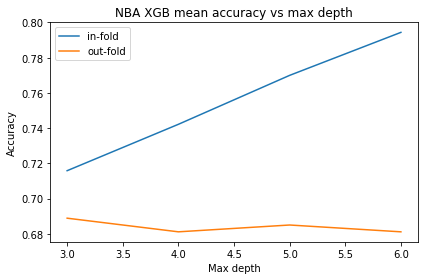

In [37]:
in_fold_md_summary = xgb_results[(xgb_results['min_samples_split'] == min_samples_split_opt) &
                                 (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['max_depth'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['max_depth'], ascending = True)
out_fold_md_summary = xgb_results[(xgb_results['min_samples_split'] == min_samples_split_opt) &
                                  (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['max_depth'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['max_depth'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Max depth")
ax.set_ylabel("Accuracy")
ax.set_title("NBA XGB mean accuracy vs max depth")
ax.plot(max_depths,
        in_fold_md_summary['mean'],
        label = "in-fold")
ax.plot(max_depths,
        out_fold_md_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

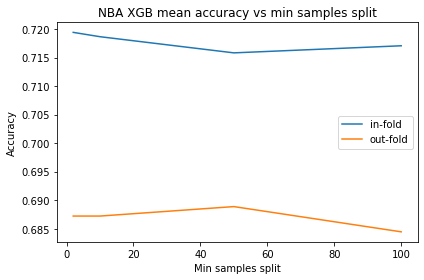

In [38]:
in_fold_mss_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                 (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['min_samples_split'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['min_samples_split'], ascending = True)
out_fold_mss_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                  (xgb_results['learning_rate'] == learning_rate_opt)].groupby(['min_samples_split'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['min_samples_split'], ascending = True)


fig, ax = plt.subplots()

ax.set_xlabel("Min samples split")
ax.set_ylabel("Accuracy")
ax.set_title("NBA XGB mean accuracy vs min samples split")
ax.plot(min_samples_splits,
        in_fold_mss_summary['mean'],
        label = "in-fold")
ax.plot(min_samples_splits,
        out_fold_mss_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

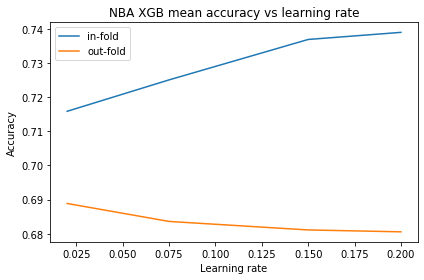

In [39]:
in_fold_lr_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                 (xgb_results['min_samples_split'] == min_samples_split_opt)].groupby(['learning_rate'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['learning_rate'], ascending = True)
out_fold_lr_summary = xgb_results[(xgb_results['max_depth'] == max_depth_opt) &
                                  (xgb_results['min_samples_split'] == min_samples_split_opt)].groupby(['learning_rate'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['learning_rate'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Learning rate")
ax.set_ylabel("Accuracy")
ax.set_title("NBA XGB mean accuracy vs learning rate")
ax.plot(learning_rates,
        in_fold_lr_summary['mean'],
        label = "in-fold")
ax.plot(learning_rates,
        out_fold_lr_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

## Training size

In [40]:
xgb_train_sizes = []
xgb_train_size_train_scores = []
xgb_train_size_test_scores = []
xgb_train_size_train_time = []
xgb_train_size_score_time = []

iter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter = iter + 1
    print("iter:", iter,
          " | train size:", train_size)
    xgb_train_size = GradientBoostingClassifier(loss = 'exponential', #deviance, exponential,
                                                       learning_rate = learning_rate_opt,
                                                       n_estimators = 500,
                                                       subsample = 1.0,
                                                       criterion = 'friedman_mse',
                                                       min_samples_split = min_samples_split_opt,
                                                       min_samples_leaf = 1,
                                                       min_weight_fraction_leaf = 0.0,
                                                       max_depth = max_depth_opt,
                                                       min_impurity_decrease = 0.0,
                                                       min_impurity_split = None,
                                                       init = None,
                                                       random_state = 28,
                                                       max_features = None,
                                                       #verbose = 1,
                                                       max_leaf_nodes = None,
                                                       warm_start = False,
                                                       #presort = 'auto',
                                                       validation_fraction = 0.1,
                                                       n_iter_no_change = 25,
                                                       #tol = 0.0001
                                                      )
    
    start = time.time()
    xgb_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    xgb_train_size_train_time.append(end - start)
    
    xgb_train_sizes.append(xgb_train_size)
    
    start = time.time()
    xgb_train_size_train_scores.append(xgb_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    xgb_train_size_score_time.append(end - start)

    xgb_train_size_test_scores.append(xgb_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

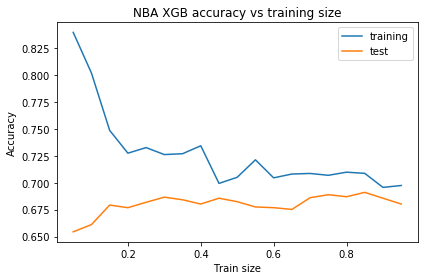

In [44]:
fig, ax = plt.subplots()
ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("NBA XGB accuracy vs training size")
ax.plot(train_sizes, xgb_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, xgb_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()
fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

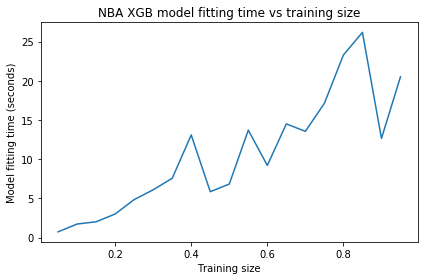

In [45]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("NBA XGB model fitting time vs training size")
ax.plot(train_sizes, xgb_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

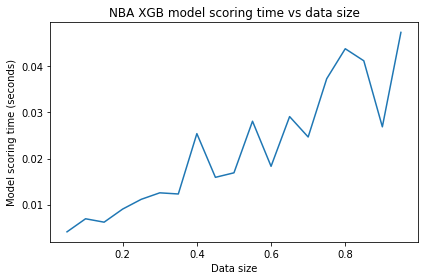

In [46]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("NBA XGB model scoring time vs data size")
ax.plot(train_sizes, xgb_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()